In [2]:
import pandas as pd
import numpy as np
from sklearn import * 
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
path = "https://raw.githubusercontent.com/abulbasar/data/master/kaggle-houseprice/data_combined_cleaned.csv"
df = pd.read_csv(path)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalesPrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000.0


In [5]:
df = df.drop(columns= ["Id"])

In [6]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalesPrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,...,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,...,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,...,0,None,None,None,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,...,0,None,None,None,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,...,0,None,None,None,0,12,2008,WD,Normal,250000.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
MSSubClass       2919 non-null int64
MSZoning         2919 non-null object
LotFrontage      2919 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      2919 non-null object
MasVnrType       2919 no

In [8]:
df = df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 79 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 no

In [26]:

target = "SalesPrice"
y = np.log(df[target])
X = df.drop(columns=[target])

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                 test_size = 0.3, random_state = 1)


pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1
                            , include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])


pipe.fit(X_train, y_train)

est = pipe.steps[-1][-1]

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("test r2: ", metrics.r2_score(y_test, y_test_pred))
print("train r2: ", metrics.r2_score(y_train, y_train_pred))
print("test rmse: ", metrics.mean_squared_error(y_test, y_test_pred) ** 0.5)
print("train rmse: ", metrics.mean_squared_error(y_train, y_train_pred) ** 0.5)


test r2:  -3.0715943247509893e+22
train r2:  0.9494518297088844
test rmse:  76190488351.17424
train rmse:  0.08606817747710854


In [27]:
summary = pd.DataFrame({"feature": X.columns, "wt": est.coef_})
summary["wt_abs"] = np.abs(summary.wt)
summary = summary.sort_values("wt_abs", ascending = False)
summary.head(10)

,feature,wt,wt_abs
15,GrLivArea,1.501695e+11,1.501695e+11
13,2ndFlrSF,-1.233520e+11,1.233520e+11
12,1stFlrSF,-1.112376e+11,1.112376e+11
219,GarageFinish_None,-1.072428e+11,1.072428e+11
134,Exterior2nd_CBlock,8.844505e+10,8.844505e+10
120,Exterior1st_CBlock,-8.844505e+10,8.844505e+10
224,GarageQual_None,7.930425e+10,7.930425e+10
229,GarageCond_None,7.930320e+10,7.930320e+10
166,BsmtCond_None,6.149525e+10,6.149525e+10
218,GarageType_None,-5.136464e+10,5.136464e+10


In [21]:
result = pd.DataFrame({"actual": y_test, "predict": y_test_pred})
result["error"] = result.predict - result.actual
result["error_abs"] = np.abs(result.error)
result = result.sort_values("error_abs", ascending = False)
result.head(10)

,actual,predict,error,error_abs
1270,12.468437,1.281787e+12,1.281787e+12,1.281787e+12
375,11.018629,9.484743e+11,9.484743e+11,9.484743e+11
1003,11.827043,1.510345e+09,1.510345e+09,1.510345e+09
1011,11.512925,1.066149e+09,1.066149e+09,1.066149e+09
120,12.100712,5.829678e+08,5.829678e+08,5.829678e+08
325,11.373663,-5.983023e+06,-5.983035e+06,5.983035e+06
810,12.106252,1.126501e+03,1.114395e+03,1.114395e+03
1386,12.429216,1.126502e+03,1.114073e+03,1.114073e+03
462,11.041048,1.174476e+01,7.037119e-01,7.037119e-01
30,10.596635,1.125554e+01,6.589056e-01,6.589056e-01


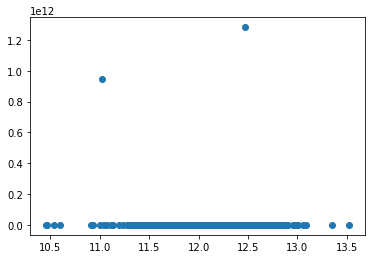

In [23]:
plt.scatter(y_test, y_test_pred)

In [81]:

target = "SalesPrice"
y = np.log(df[target])
X = df.drop(columns=[target])

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                 test_size = 0.3, random_state = 345)


pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1
                            , include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.Lasso(alpha=0.001, random_state=1))
])


pipe.fit(X_train, y_train)

est = pipe.steps[-1][-1]

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("test r2: ", metrics.r2_score(y_test, y_test_pred))
print("train r2: ", metrics.r2_score(y_train, y_train_pred))
print("test rmse: ", metrics.mean_squared_error(y_test, y_test_pred) ** 0.5)
print("train rmse: ", metrics.mean_squared_error(y_train, y_train_pred) ** 0.5)

print("intercept", est.intercept_)
summary = pd.DataFrame({"feature": X.columns, "wt": est.coef_})
summary["wt_abs"] = np.abs(summary.wt)
summary = summary.sort_values("wt_abs", ascending = False)
summary.head(10)

test r2:  0.8593664050129219
train r2:  0.9417744914458408
test rmse:  0.15286617387973966
train rmse:  0.09546538100644747
intercept 12.020042844083623


,feature,wt,wt_abs
236,PoolQC_None,0.205815,0.205815
32,PoolArea,0.199534,0.199534
15,GrLivArea,0.109392,0.109392
3,OverallQual,0.065860,0.065860
5,YearBuilt,0.053681,0.053681
4,OverallCond,0.038850,0.038850
235,PoolQC_Gd,-0.037863,0.037863
257,SaleCondition_Partial,0.033361,0.033361
90,Condition2_PosN,-0.032722,0.032722
60,Neighborhood_Crawfor,0.031937,0.031937


In [78]:
summary[summary.wt>0.0].shape, summary.shape

((97, 3), (258, 3))

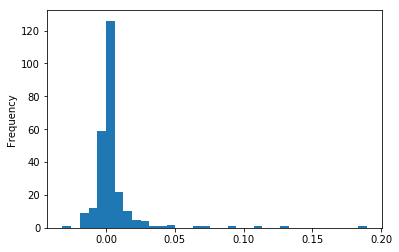

In [68]:
pd.Series(est.coef_).plot.hist(bins = 35)

std of error:  0.15998479405917257


,actual,predict,error,error_abs
120,12.100712,10.601555,-1.499158,1.499158
30,10.596635,11.474458,0.877824,0.877824
495,10.460242,11.337666,0.877424,0.877424
916,10.471950,11.158687,0.686738,0.686738
462,11.041048,11.709700,0.668652,0.668652
812,10.932982,11.521296,0.588314,0.588314
968,10.542706,11.034659,0.491953,0.491953
1432,11.074421,11.539334,0.464914,0.464914
1000,11.314475,10.879646,-0.434828,0.434828
970,11.813030,11.384298,-0.428732,0.428732


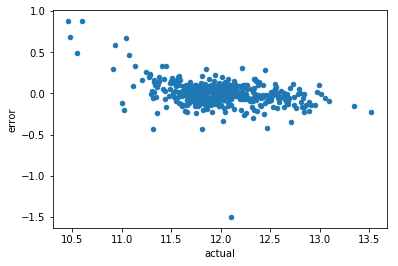

In [69]:
result = pd.DataFrame({"actual": y_test, "predict": y_test_pred})
result["error"] = result.predict - result.actual
result["error_abs"] = np.abs(result.error)
result = result.sort_values("error_abs", ascending = False)

result.plot.scatter("actual", "error")
print("std of error: ", result.error.std())
result.head(10)


In [70]:
result.sort_values("actual", ascending=False).head()

,actual,predict,error,error_abs
1182,13.521139,13.301396,-0.219744,0.219744
1169,13.345507,13.195186,-0.150321,0.150321
798,13.091904,13.002455,-0.089450,0.089450
1373,13.053013,12.996639,-0.056374,0.056374
527,13.008659,13.003268,-0.005391,0.005391


In [71]:

target = "SalesPrice"
y = np.log(df[target])
X = df.drop(columns=[target])

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                 test_size = 0.3, random_state = 1)


pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1
                            , include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.Ridge(alpha=150.0, random_state=1))
])


pipe.fit(X_train, y_train)

est = pipe.steps[-1][-1]

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("test r2: ", metrics.r2_score(y_test, y_test_pred))
print("train r2: ", metrics.r2_score(y_train, y_train_pred))
print("test rmse: ", metrics.mean_squared_error(y_test, y_test_pred) ** 0.5)
print("train rmse: ", metrics.mean_squared_error(y_train, y_train_pred) ** 0.5)

print("intercept", est.intercept_)
summary = pd.DataFrame({"feature": X.columns, "wt": est.coef_})
summary["wt_abs"] = np.abs(summary.wt)
summary = summary.sort_values("wt_abs", ascending = False)
summary.head(10)

test r2:  0.8774960380905438
train r2:  0.9302792062779718
test rmse:  0.15215768645511485
train rmse:  0.10108135338296527
intercept 12.032638784447805


,feature,wt,wt_abs
3,OverallQual,0.052883,0.052883
15,GrLivArea,0.040431,0.040431
12,1stFlrSF,0.029292,0.029292
70,Neighborhood_NridgHt,0.028174,0.028174
4,OverallCond,0.027186,0.027186
25,GarageCars,0.027166,0.027166
22,TotRmsAbvGrd,0.023488,0.023488
60,Neighborhood_Crawfor,0.023127,0.023127
13,2ndFlrSF,0.022081,0.022081
76,Neighborhood_StoneBr,0.021864,0.021864


std of error:  0.1523281034460113


,actual,predict,error,error_abs
30,10.596635,11.504242,0.907607,0.907607
495,10.460242,11.365491,0.905249,0.905249
916,10.471950,11.245620,0.773671,0.773671
462,11.041048,11.717703,0.676655,0.676655
812,10.932982,11.527547,0.594565,0.594565
968,10.542706,11.109922,0.567215,0.567215
1432,11.074421,11.588141,0.513720,0.513720
1000,11.314475,10.856873,-0.457602,0.457602
1270,12.468437,12.040374,-0.428063,0.428063
1279,11.133128,11.537948,0.404820,0.404820


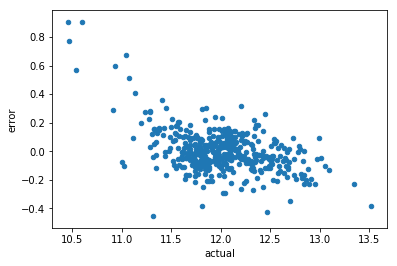

In [72]:
result = pd.DataFrame({"actual": y_test, "predict": y_test_pred})
result["error"] = result.predict - result.actual
result["error_abs"] = np.abs(result.error)
result = result.sort_values("error_abs", ascending = False)

result.plot.scatter("actual", "error")
print("std of error: ", result.error.std())
result.head(10)



In [79]:

target = "SalesPrice"
y = np.log(df[target])
X = df.drop(columns=[target])

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                 test_size = 0.3, random_state = 1)


pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1
                            , include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.ElasticNet(alpha=0.01, l1_ratio=0.5
                            , random_state=1423423))
])


pipe.fit(X_train, y_train)

est = pipe.steps[-1][-1]

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("test r2: ", metrics.r2_score(y_test, y_test_pred))
print("train r2: ", metrics.r2_score(y_train, y_train_pred))
print("test rmse: ", metrics.mean_squared_error(y_test, y_test_pred) ** 0.5)
print("train rmse: ", metrics.mean_squared_error(y_train, y_train_pred) ** 0.5)

print("intercept", est.intercept_)
summary = pd.DataFrame({"feature": X.columns, "wt": est.coef_})
summary["wt_abs"] = np.abs(summary.wt)
summary = summary.sort_values("wt_abs", ascending = False)
summary.head(10)

test r2:  0.8832497152982852
train r2:  0.9119521556819916
test rmse:  0.1485414992986777
train rmse:  0.11359239347908372
intercept 12.032638784447805


,feature,wt,wt_abs
15,GrLivArea,0.091909,0.091909
3,OverallQual,0.088640,0.088640
25,GarageCars,0.049258,0.049258
5,YearBuilt,0.035001,0.035001
4,OverallCond,0.028759,0.028759
70,Neighborhood_NridgHt,0.026675,0.026675
60,Neighborhood_Crawfor,0.026182,0.026182
39,MSZoning_RM,-0.021363,0.021363
90,Condition2_PosN,-0.020887,0.020887
16,BsmtFullBath,0.019741,0.019741


std of error:  0.14868402448228435


,actual,predict,error,error_abs
495,10.460242,11.394600,0.934358,0.934358
30,10.596635,11.483371,0.886736,0.886736
916,10.471950,11.233221,0.761271,0.761271
812,10.932982,11.606818,0.673836,0.673836
462,11.041048,11.691958,0.650910,0.650910
968,10.542706,11.178766,0.636060,0.636060
1432,11.074421,11.570181,0.495760,0.495760
970,11.813030,11.397264,-0.415766,0.415766
3,11.849398,12.253793,0.404396,0.404396
1279,11.133128,11.536853,0.403725,0.403725


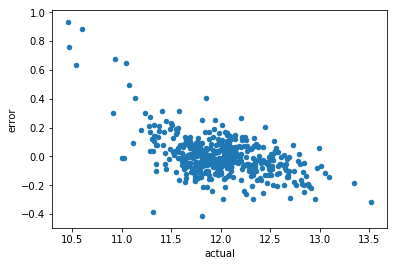

In [74]:
result = pd.DataFrame({"actual": y_test, "predict": y_test_pred})
result["error"] = result.predict - result.actual
result["error_abs"] = np.abs(result.error)
result = result.sort_values("error_abs", ascending = False)

result.plot.scatter("actual", "error")
print("std of error: ", result.error.std())
result.head(10)


In [84]:
target = "SalesPrice"
y = np.log(df[target])
X = df.drop(columns=[target])

X = pd.get_dummies(X, drop_first=True)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1
                            , include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.ElasticNet(alpha=0.01, l1_ratio=0.5
                            , random_state=1423423))
])

scores = model_selection.cross_val_score(pipe, X, y, cv=5, scoring="")
np.mean(scores), scores

(0.8639817940552907,
 array([0.91455065, 0.87642252, 0.87174614, 0.89602138, 0.76116829]))